In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
from sklearn import preprocessing 
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

SyntaxError: unexpected character after line continuation character (961359179.py, line 13)

In [22]:
# Number of samples
num_samples = 200

# Random seed for reproducibility
np.random.seed(42)

# Numeric columns
ages = np.random.randint(18, 70, num_samples)  # Ages between 18 and 69
incomes = np.random.randint(20000, 100000, num_samples)  # Income from 20k to 100k

# Categorical columns
genders = np.random.choice(['Male', 'Female', 'Non-Binary'], num_samples)  # Gender distribution
cities = np.random.choice(
    ['New York', 'Los Angeles', 'Chicago', 'Houston', 'Phoenix'], num_samples
)  # Random cities

# Target column indicating if a product is purchased
# Let's assume people with age between 25 and 60, income > 50000, and gender = 'Female' are more likely to purchase
product_purchased = (
    (ages > 25) & (ages < 60) & (incomes > 50000) & (genders == 'Female')
).astype(int)

# Combine into a DataFrame
df = pd.DataFrame({
    "Age": ages,
    "Income": incomes,
    "Gender": genders,
    "City": cities,
    "Product Purchased": product_purchased  # Target column
})

print("Sample of the dataset with target column:")
print(df.head())


Sample of the dataset with target column:
   Age  Income      Gender         City  Product Purchased
0   56   78053        Male      Phoenix                  0
1   69   41959  Non-Binary      Phoenix                  0
2   46   25530      Female  Los Angeles                  0
3   32   23748        Male     New York                  0
4   60   33545      Female  Los Angeles                  0


In [23]:
X=df.drop(['Product Purchased'], axis=1) 
y=df['Product Purchased']

In [24]:

label_encoder = preprocessing.LabelEncoder()
X['Gender'] = label_encoder.fit_transform(X['Gender'])
X['City'] = label_encoder.fit_transform(X['City'])


scaler = MinMaxScaler()
df_encoded = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [25]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
k=3
best_features = SelectKBest(score_func=chi2, k=k)
X_train_new = best_features.fit_transform(X_train, y_train)
X_test_new = best_features.transform(X_test)


clf = DecisionTreeClassifier()
clf.fit(X_train_new, y_train)

DecisionTreeClassifier()

In [27]:
y_pred = clf.predict(X_test_new)

accuracy = accuracy_score(y_test, y_pred)
print('Model accuracy score: {0:0.4f}'.format(accuracy))

Model accuracy score: 0.8500


In [28]:
# performance of the model

cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm)

from sklearn.metrics import classification_report
print("Classification Report\n")
print(classification_report(y_test, y_pred))


Confusion matrix

 [[31  3]
 [ 3  3]]
Classification Report

              precision    recall  f1-score   support

           0       0.91      0.91      0.91        34
           1       0.50      0.50      0.50         6

    accuracy                           0.85        40
   macro avg       0.71      0.71      0.71        40
weighted avg       0.85      0.85      0.85        40



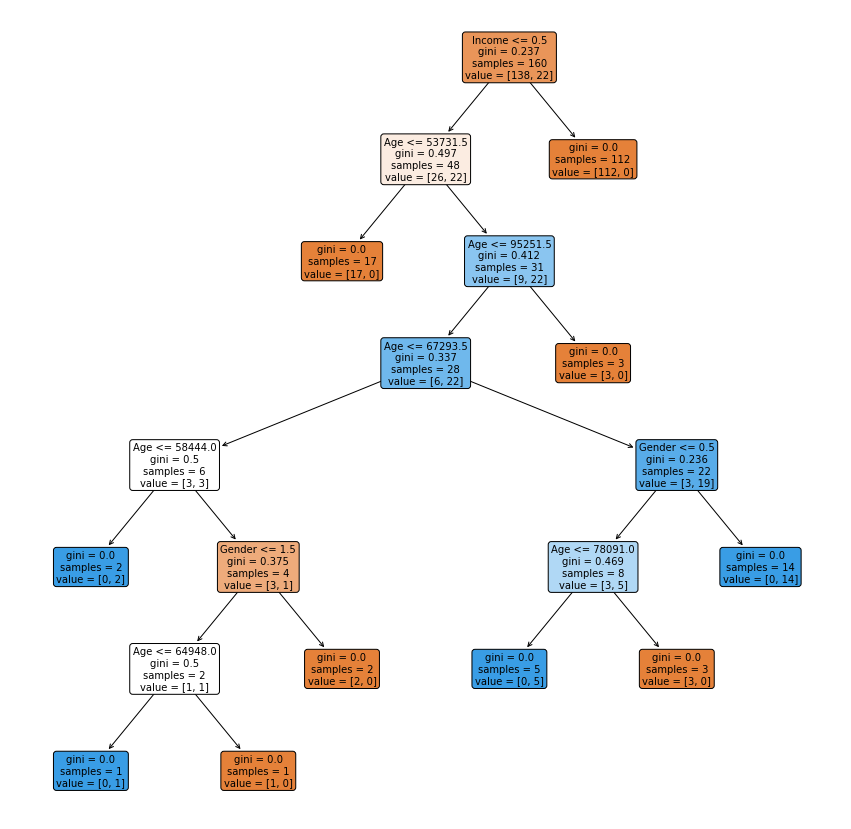

In [29]:
plt.figure(figsize=(15,15))
from sklearn import tree
tree.plot_tree(clf,feature_names=X.columns, filled=True, rounded=True, fontsize=10)
plt.show()